In [1]:
import pandas as pd

In [2]:
df = pd.read_json("review.txt",orient='values',nrows=850000,lines=True)

In [3]:
df

,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile
0,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,"{'username': 'Papa_Panda', 'num_cities': 22, '...",December 2012,93338,0,2012-12-17,147643103,False
1,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...","{'username': 'Maureen V', 'num_reviews': 2, 'n...",December 2012,93338,0,2012-12-17,147639004,False
2,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Great Stay”,This is a great property in Midtown. We two di...,"{'username': 'vuguru', 'num_cities': 12, 'num_...",December 2012,1762573,0,2012-12-18,147697954,False
3,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Modern Convenience”,The Andaz is a nice hotel in a central locatio...,"{'username': 'Hotel-Designer', 'num_cities': 5...",August 2012,1762573,0,2012-12-17,147625723,False
4,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,"{'username': 'JamesE339', 'num_cities': 34, 'n...",December 2012,1762573,0,2012-12-17,147612823,False
...,...,...,...,...,...,...,...,...,...,...
849995,"{'service': 2.0, 'cleanliness': 5.0, 'overall'...",“mid range hotel with comfortable beds lacking...,This was my first stay at the Capital Hilton a...,"{'username': 'starflyergold', 'num_cities': 49...",October 2010,84107,3,2010-10-15,83575297,False
849996,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...","“Great location, nicely remodeled rooms.”",The Capital Hilton was a very nice hotel. The ...,"{'username': 'cwjw', 'num_cities': 3, 'num_hel...",September 2010,84107,0,2010-10-08,82658236,False
849997,"{'service': 4.0, 'cleanliness': 4.0, 'overall'...",“Just got back - PERFECT location”,We flew into Ronald Regan. The hotel offers no...,"{'username': 'MSGirl035', 'num_cities': 3, 'nu...",June 2007,84074,0,2007-06-25,7988032,False
849998,"{'service': 4.0, 'cleanliness': 4.0, 'overall'...","“No nonsense, well located hotel”","Clean, well run hotel located within easy walk...","{'username': 'caesarsmum', 'num_cities': 14, '...",June 2007,84074,1,2007-06-06,7795843,False


In [4]:
UnnestedJson=pd.json_normalize(df['ratings'])

In [5]:
df=pd.concat([df,UnnestedJson],axis=1)

In [6]:
df['date_stayed'].str[-4:].value_counts()

2012    257141
2011    192286
2010    108556
2009     73134
2008     52593
2007     44861
2006     28449
2005     21569
2004      4236
2003       922
2002       152
2001        51
2000        38
1999        30
ear0        25
             6
Name: date_stayed, dtype: int64

In [7]:
df['text'].str.lower().str.contains('gym').sum()

21102

In [8]:
from dandy import *

In [9]:
from nltk.corpus import stopwords
stops=list(stopwords.words('english'))+['um','know','try','trying','get',
                                        "that's","think",'say',
                                        "there's",'lot','go','back',
                                       "would",'yeah',"i'm",'also','even','way','got',
                                       'things','well','like','kind','something','actually','still','5',"one",
                                       'might','maybe','could','okay',"we've","they're","we're"]
def tokennamefilter(tokenlist,minlen=2):
    tokens = [x for x in tokenlist if x not in stops]
    return (tokens)

In [10]:
get_ngrams(df[(df['text'].str.lower().str.contains('gym'))  & (df['overall']==5.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),3).\
           value_counts().reset_index().\
           rename(columns={0:'Count'}).\
            assign(Keyword2 =lambda x:x.text.str.contains('gym')*1).query('Keyword2==1')[['text','Count']].head(25)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,text,Count
44,gym swimming pool,51
54,24 hour gym,46
77,gym business center,37
80,use pool gym,36
81,swimming pool gym,36
83,salle de gym,36
88,gym pool area,36
99,use gym pool,34
101,gym open 24,34
113,gym top floor,32


In [14]:
get_ngrams(df[(df['text'].str.lower().str.contains('food'))  & (df['overall']==5.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),3).\
           value_counts().reset_index().\
           rename(columns={0:'Count'}).\
            assign(Keyword2 =lambda x:x.text.str.contains('food')*1).query('Keyword2==1')[['text','Count']].head(25)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,text,Count
12,room service food,593
45,great food great,261
55,food great service,238
56,service great food,236
74,food good service,207
85,food room service,199
93,food service excellent,186
95,great food service,185
97,food really good,181
102,restaurant great food,175


In [19]:
get_ngrams(df[(df['text'].str.lower().str.contains('food'))  & (df['overall']<3) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),3).\
           value_counts().reset_index().\
           rename(columns={0:'Count'}).\
            assign(Keyword2 =lambda x:x.text.str.contains('food')*1).query('Keyword2==1')[['text','Count']].head(25)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,text,Count
3,room service food,210
40,food room service,64
53,food good service,50
66,fast food places,45
90,food pretty good,36
107,restaurant food good,34
133,service food good,31
186,fast food restaurants,26
214,restaurant good food,25
235,half eaten food,23


In [20]:
get_ngrams(df[(df['text'].str.lower().str.contains('breakfast'))  & (df['overall']==5.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),3).\
           value_counts().reset_index().\
           rename(columns={0:'Count'}).\
            assign(Keyword2 =lambda x:x.text.str.contains('breakfast')).query('Keyword2==1')[['text','Count']].\
            assign(Keyword2 =lambda x:x.text.str.contains('free')==False).query('Keyword2==1')[['text','Count']].\
            assign(Keyword2 =lambda x:x.text.str.contains('continental')==False).query('Keyword2==1')[['text','Count']].head(25)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,text,Count
13,breakfast every morning,993
22,room service breakfast,843
59,breakfast next morning,477
79,breakfast lunch dinner,412
93,breakfast included room,375
98,friendly helpful breakfast,370
105,breakfast hotel restaurant,361
113,breakfast happy hour,343
115,breakfast included price,338
133,breakfast buffet good,313


In [13]:
get_ngrams(df[(df['text'].str.lower().str.contains('breakfast'))  & (df['overall']==5.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),3).\
           value_counts().reset_index().\
           rename(columns={0:'Count'}).\
            assign(Keyword2 =lambda x:x.text.str.contains('breakfast')*1).query('Keyword2==1')[['text','Count']].head(25)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,text,Count
13,breakfast every morning,993
17,free continental breakfast,949
22,room service breakfast,843
59,breakfast next morning,477
60,complimentary continental breakfast,474
68,continental breakfast included,457
79,breakfast lunch dinner,412
93,breakfast included room,375
98,friendly helpful breakfast,370
105,breakfast hotel restaurant,361


In [16]:
get_ngrams(df[(df['text'].str.lower().str.contains('breakfast'))  & (df['overall']<=2.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),3).\
           value_counts().reset_index().\
           rename(columns={0:'Count'}).\
            assign(Keyword2 =lambda x:x.text.str.contains('breakfast')*1).query('Keyword2==1')[['text','Count']].head(25)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,text,Count
10,free continental breakfast,230
13,room service breakfast,204
17,breakfast next morning,187
38,us free breakfast,119
54,complimentary continental breakfast,90
60,breakfast room service,83
67,offered free breakfast,80
81,next morning breakfast,70
82,breakfast included room,69
92,breakfast hotel restaurant,67


In [12]:
get_ngrams(df[(df['text'].str.lower().str.contains('music'))  & (df['overall']==5.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),3).\
           value_counts().reset_index().\
           rename(columns={0:'Count'}).\
            assign(Keyword2 =lambda x:x.text.str.contains('music')*1).query('Keyword2==1')[['text','Count']].head(25)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,text,Count
0,radio city music,398
1,city music hall,394
19,soft music playing,67
20,experience music project,66
29,classical music playing,52
62,music hall rockefeller,36
67,needle experience music,35
75,music playing room,33
93,great live music,29
96,bar live music,29


In [15]:
get_ngrams(df[(df['text'].str.lower().str.contains('jazz'))  & (df['overall']==5.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),3).\
           value_counts().reset_index().\
           rename(columns={0:'Count'}).\
            assign(Keyword2 =lambda x:x.text.str.contains('jazz')*1).query('Keyword2==1')[['text','Count']].head(25)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,text,Count
8,live jazz music,18
12,jazz music playing,17
17,jazz band playing,14
18,live jazz band,14
30,bar live jazz,10
41,soft jazz playing,9
58,great live jazz,8
61,restaurants jazz clubs,8
66,show jazz alley,7
71,jazz clubs restaurants,7


In [11]:
get_ngrams(df[(df['text'].str.lower().str.contains('gym'))  & (df['overall']<2.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),3).\
           value_counts().reset_index().\
           rename(columns={0:'Count'}).\
            assign(Keyword2 =lambda x:x.text.str.contains('gym')*1).query('Keyword2==1')[['text','Count']].head(25)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,text,Count
11,gym locker room,8
36,fee use gym,4
60,day use gym,3
91,pay use gym,3
99,gym two treadmills,3
106,high school gym,3
116,charge use gym,3
120,gym business center,3
123,use gym 10,3
158,hot tub gym,2


In [12]:
get_ngrams(df[(df['text'].str.lower().str.contains('gym'))  & (df['overall']==5.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),3).\
           value_counts().head(25)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


text                      
within walking distance       408
flat screen tv                314
front desk staff              295
staff friendly helpful        248
empire state building         206
highly recommend hotel        202
hotel great location          156
free wi fi                    156
pool hot tub                  134
recommend hotel anyone        125
right across street           111
great place stay              105
king size bed                  95
new york city                  90
free internet access           87
definitely recommend hotel     85
stayed 3 nights                80
home away home                 75
easy walking distance          74
staff extremely friendly       73
floor ceiling windows          71
10 minute walk                 70
stayed 4 nights                69
really enjoyed stay            68
friendly helpful staff         68
dtype: int64

In [13]:
get_ngrams(df[(df['text'].str.lower().str.contains('bath'))  & (df['overall']==5.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),3).\
           value_counts().head(25)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


KeyboardInterrupt: 

In [ ]:
get_ngrams(df[(df['text'].str.lower().str.contains('bath'))  & (df['overall']<=2.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),3).\
           value_counts().head(25)

In [ ]:
get_ngrams(df[(df['text'].str.lower().str.contains('bath'))  & (df['overall']==5.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),2).\
           value_counts().head(25)

In [ ]:
get_ngrams(df[(df['text'].str.lower().str.contains('conference'))  & (df['overall']==5.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),2).\
           value_counts().head(25)

In [ ]:
get_ngrams(df[(df['text'].str.lower().str.contains('views'))  & (df['overall']==5.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),2).\
           value_counts().head(25)

In [ ]:
get_ngrams(df[(df['text'].str.lower().str.contains('gross'))  & (df['overall']<=2.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),2).\
           value_counts().head(25)

In [47]:
get_ngrams(df[(df['text'].str.lower().str.contains('cram'))  & (df['overall']<=2.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),2).\
           value_counts().head(25)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


text            
front desk          1017
small cramped        277
room service         249
scrambled eggs       223
new york             221
room small           213
next morning         157
per night            156
hotel room           155
desk staff           151
next day             141
next door            132
stay hotel           132
another room         132
room cramped         132
night stay           127
never stay           126
much better          125
air conditioning     123
called front         121
rooms small          118
across street        111
star hotel           110
times square         110
told us              110
dtype: int64

In [46]:
get_ngrams(df[(df['text'].str.lower().str.contains('cram'))  & (df['overall']<=2.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),3).\
           value_counts().head(25)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


text                   
front desk staff           119
called front desk          119
room small cramped          78
king size bed               43
4 star hotel                43
front desk told             39
front desk clerk            38
holiday inn express         37
rooms small cramped         37
within walking distance     36
went front desk             36
non smoking room            35
two double beds             32
front desk said             32
new york city               31
flat screen tv              31
00 per night                30
call front desk             29
stayed two nights           28
small cramped room          26
stay somewhere else         26
2 double beds               25
scrambled eggs bacon        24
front desk manager          24
asked front desk            23
dtype: int64

In [48]:
get_ngrams(df[(df['text'].str.lower().str.contains('tiny'))  & (df['overall']<=2.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),3).\
           value_counts().head(25)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


text                   
called front desk          309
front desk staff           259
4 star hotel               134
front desk clerk           121
non smoking room           105
went front desk            101
walls paper thin           101
front desk told            100
room tiny bathroom          98
within walking distance     95
stay somewhere else         92
king size bed               86
front desk said             78
hotel ever stayed           77
call front desk             76
worst hotel ever            76
new york city               72
hotel great location        71
recommend hotel anyone      68
flat screen tv              68
two double beds             67
queen size bed              67
2 double beds               65
us another room             59
room next door              58
dtype: int64

In [49]:
get_ngrams(df[(df['text'].str.lower().str.contains('tiny'))  & (df['overall']<=2.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),2).\
           value_counts().head(25)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


text            
front desk          2508
room tiny           1287
new york             796
tiny room            692
rooms tiny           678
bathroom tiny        675
room service         548
room small           484
per night            475
hotel room           469
tiny bathroom        427
next door            405
another room         402
stay hotel           389
next day             371
air conditioning     357
much better          344
times square         341
star hotel           337
never stay           334
great location       333
next morning         332
stayed hotel         326
night stay           324
called front         315
dtype: int64

In [58]:
get_ngrams(df[(df['text'].str.lower().str.contains('bathroom'))  & (df['overall']<=2.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),2).\
           value_counts().head(25)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


text            
front desk          11373
new york             2490
room service         2278
another room         1837
hotel room           1752
room small           1696
next day             1649
stay hotel           1637
next morning         1588
per night            1493
called front         1434
next door            1425
bathroom door        1415
stayed hotel         1399
never stay           1375
desk staff           1337
air conditioning     1303
star hotel           1302
customer service     1300
bathroom small       1259
non smoking          1225
hot water            1222
told us              1212
night stay           1208
bathroom floor       1194
dtype: int64

In [52]:
get_ngrams(df[(df['text'].str.lower().str.contains('noise'))  & (df['overall']<=2.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),2).\
           value_counts().head(25)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


text            
front desk          4913
next door           1072
street noise        1043
room service         842
new york             829
next day             796
another room         787
called front         783
air conditioning     760
next morning         752
first night          697
hotel room           680
stay hotel           650
stayed hotel         600
desk staff           589
room small           579
room next            577
hotel staff          548
across street        547
per night            530
night stay           527
traffic noise        516
customer service     509
air conditioner      505
room clean           500
dtype: int64

In [53]:
get_ngrams(df[(df['text'].str.lower().str.contains('stink'))  & (df['overall']<=2.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),2).\
           value_counts().head(25)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


text            
front desk          384
non smoking         133
smoking room        129
new york             77
another room         73
next day             70
next morning         57
told us              55
called front         55
customer service     54
stay hotel           54
hotel room           54
room service         52
next door            51
gave us              50
worst hotel          50
room room            48
room smelled         47
never stay           47
first room           46
first night          46
somewhere else       42
another hotel        41
hotel staff          41
hotel ever           41
dtype: int64

In [ ]:
get_ngrams(df[(df['text'].str.lower().str.contains('parking'))  & (df['overall']<=2.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),2).\
           value_counts().head(25)

In [54]:
get_ngrams(df[(df['text'].str.lower().str.contains('smell'))  & (df['overall']<=2.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),2).\
           value_counts().head(25)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


text            
front desk          5847
room smelled        2122
non smoking         2015
smoking room        1718
another room        1264
next day             879
next morning         864
stay hotel           847
never stay           847
hotel room           768
new york             762
next door            739
room service         712
called front         708
customer service     659
first room           655
new room             636
told us              618
another hotel        616
desk clerk           614
desk staff           612
stayed hotel         612
cigarette smoke      610
room room            589
per night            586
dtype: int64

In [55]:
get_ngrams(df[(df['text'].str.lower().str.contains('odor'))  & (df['overall']<=2.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),2).\
           value_counts().head(25)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


text            
front desk          938
non smoking         251
smoking room        207
another room        195
musty odor          140
next morning        134
stay hotel          133
room smelled        127
called front        123
next day            119
new york            116
desk clerk          104
hotel room          104
desk staff          103
room service        103
first room          102
odor room           100
customer service     99
next door            97
room room            97
strong odor          88
never stay           87
first night          87
holiday inn          86
air conditioner      86
dtype: int64

<AxesSubplot:title={'center':'overall'}, xlabel='[Keyword]'>

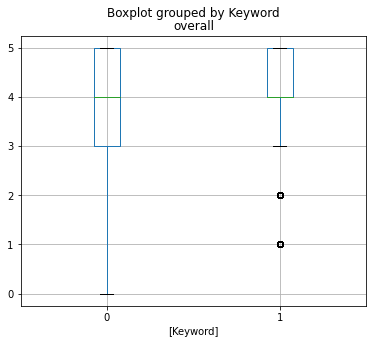

In [56]:
df.assign(Keyword = lambda x:x.text.str.lower().str.contains('gym')*1)[['Keyword','overall']].\
    boxplot(by='Keyword',figsize=(6,5))

<AxesSubplot:title={'center':'overall'}, xlabel='[Keyword]'>

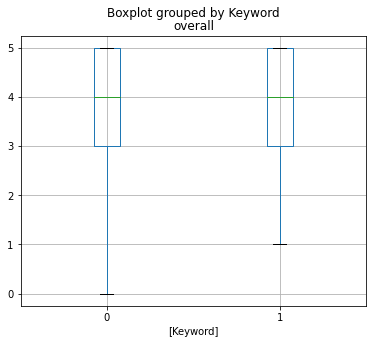

In [57]:
df.assign(Keyword = lambda x:x.text.str.lower().str.contains('conference room')*1)[['Keyword','overall']].\
    boxplot(by='Keyword',figsize=(6,5))

<AxesSubplot:title={'center':'overall'}, xlabel='[Keyword]'>

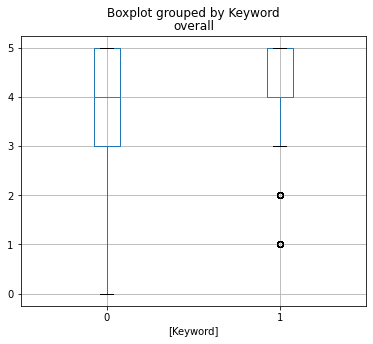

In [31]:
df.assign(Keyword = lambda x:x.text.str.lower().str.contains('room view')*1)[['Keyword','overall']].\
    boxplot(by='Keyword',figsize=(6,5))

<AxesSubplot:title={'center':'overall'}, xlabel='[Keyword]'>

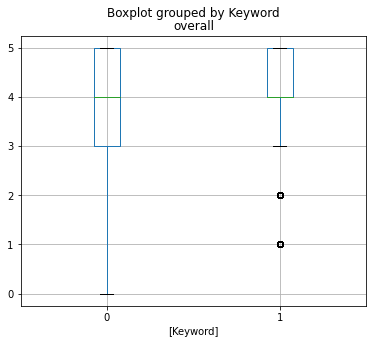

In [32]:
df.assign(Keyword = lambda x:x.text.str.lower().str.contains('balcony')*1)[['Keyword','overall']].\
    boxplot(by='Keyword',figsize=(6,5))

<AxesSubplot:title={'center':'overall'}, xlabel='[Keyword]'>

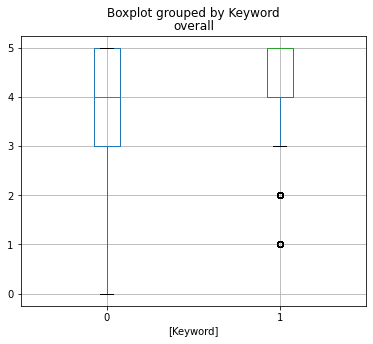

In [33]:
df.assign(Keyword = lambda x:x.text.str.lower().str.contains('fireplace')*1)[['Keyword','overall']].\
    boxplot(by='Keyword',figsize=(6,5))

<AxesSubplot:title={'center':'overall'}, xlabel='[Keyword]'>

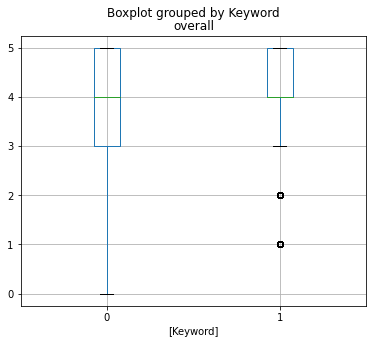

In [34]:
df.assign(Keyword = lambda x:x.text.str.lower().str.contains('sofa')*1)[['Keyword','overall']].\
    boxplot(by='Keyword',figsize=(6,5))

<AxesSubplot:title={'center':'overall'}, xlabel='[Keyword]'>

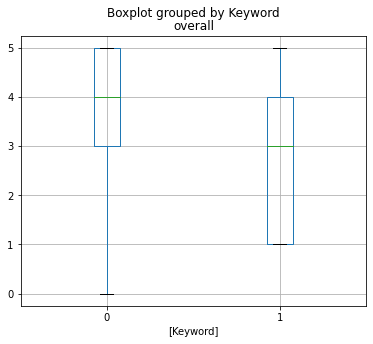

In [35]:
df.assign(Keyword = lambda x:x.text.str.lower().str.contains('smell')*1)[['Keyword','overall']].\
    boxplot(by='Keyword',figsize=(6,5))

<AxesSubplot:title={'center':'overall'}, xlabel='[Keyword]'>

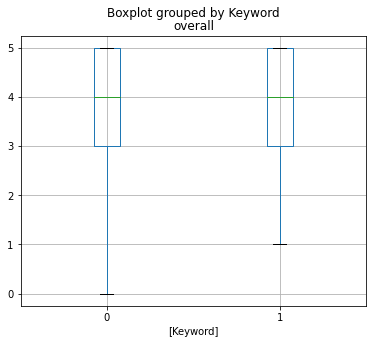

In [36]:
df.assign(Keyword = lambda x:x.text.str.lower().str.contains('noise')*1)[['Keyword','overall']].\
    boxplot(by='Keyword',figsize=(6,5))

<AxesSubplot:title={'center':'overall'}, xlabel='[Keyword]'>

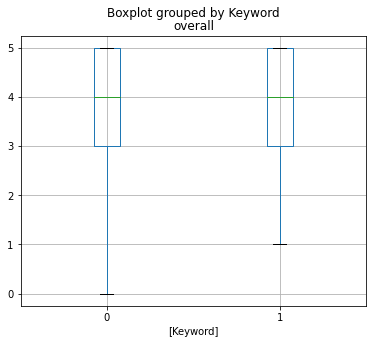

In [37]:
df.assign(Keyword = lambda x:x.text.str.lower().str.contains('street noise')*1)[['Keyword','overall']].\
    boxplot(by='Keyword',figsize=(6,5))

<AxesSubplot:title={'center':'overall'}, xlabel='[Keyword]'>

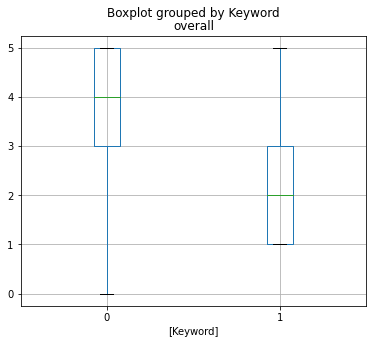

In [38]:
df.assign(Keyword = lambda x:x.text.str.lower().str.contains('paper thin walls')*1)[['Keyword','overall']].\
    boxplot(by='Keyword',figsize=(6,5))

<AxesSubplot:title={'center':'overall'}, xlabel='[Keyword]'>

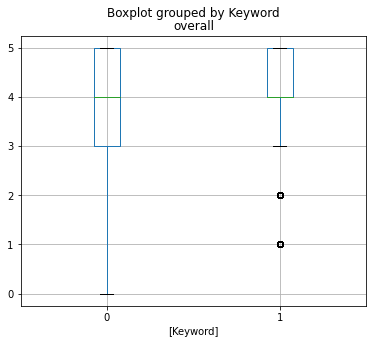

In [39]:
df.assign(Keyword = lambda x:x.text.str.lower().str.contains('breakfast')*1)[['Keyword','overall']].\
    boxplot(by='Keyword',figsize=(6,5))

<AxesSubplot:title={'center':'overall'}, xlabel='[Keyword]'>

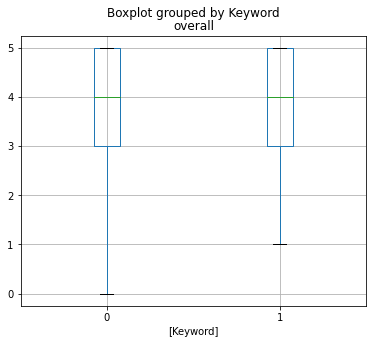

In [40]:
df.assign(Keyword = lambda x:x.text.str.lower().str.contains('small')*1)[['Keyword','overall']].\
    boxplot(by='Keyword',figsize=(6,5))

<AxesSubplot:title={'center':'overall'}, xlabel='[Keyword]'>

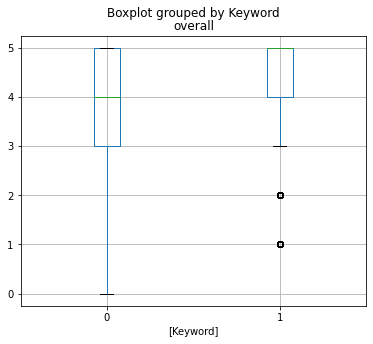

In [41]:
df.assign(Keyword = lambda x:x.text.str.lower().str.contains('cozy')*1)[['Keyword','overall']].\
    boxplot(by='Keyword',figsize=(6,5))

<AxesSubplot:title={'center':'overall'}, xlabel='[Keyword]'>

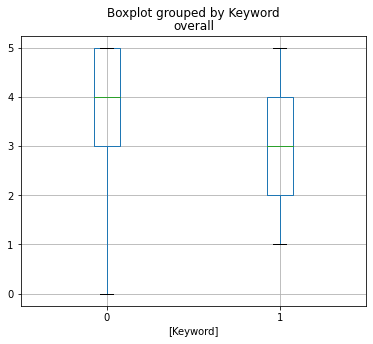

In [42]:
df.assign(Keyword = lambda x:x.text.str.lower().str.contains('tiny')*1)[['Keyword','overall']].\
    boxplot(by='Keyword',figsize=(6,5))

<AxesSubplot:title={'center':'overall'}, xlabel='[Keyword]'>

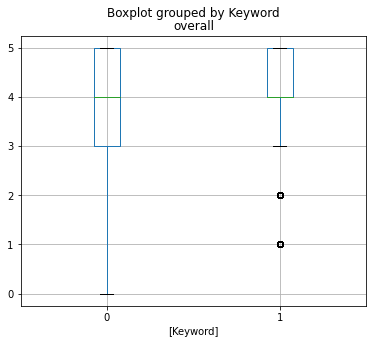

In [43]:
df.assign(Keyword = lambda x:x.text.str.lower().str.contains('cute')*1)[['Keyword','overall']].\
    boxplot(by='Keyword',figsize=(6,5))

<AxesSubplot:title={'center':'overall'}, xlabel='[Keyword]'>

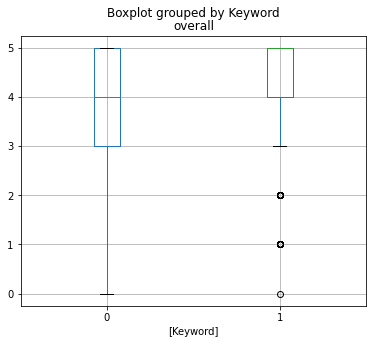

In [44]:
df.assign(Keyword = lambda x:x.text.str.lower().str.contains('adorable')*1)[['Keyword','overall']].\
    boxplot(by='Keyword',figsize=(6,5))

<AxesSubplot:title={'center':'overall'}, xlabel='[Keyword]'>

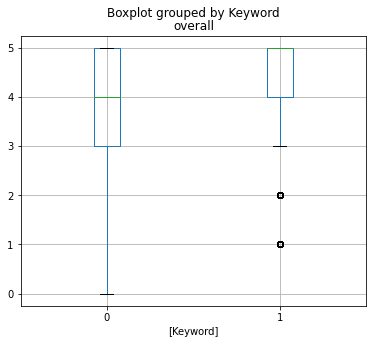

In [45]:
df.assign(Keyword = lambda x:x.text.str.lower().str.contains('romantic')*1)[['Keyword','overall']].\
    boxplot(by='Keyword',figsize=(6,5))

<AxesSubplot:title={'center':'overall'}, xlabel='[Keyword]'>

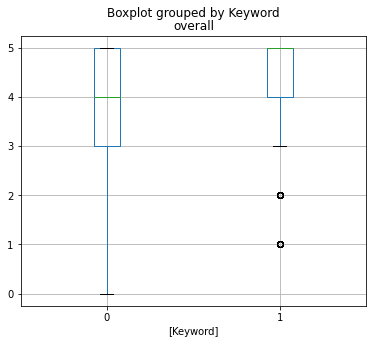

In [11]:
df.assign(Keyword = lambda x:x.text.str.lower().str.contains('sexy')*1)[['Keyword','overall']].\
    boxplot(by='Keyword',figsize=(6,5))

<AxesSubplot:title={'center':'overall'}, xlabel='[Keyword]'>

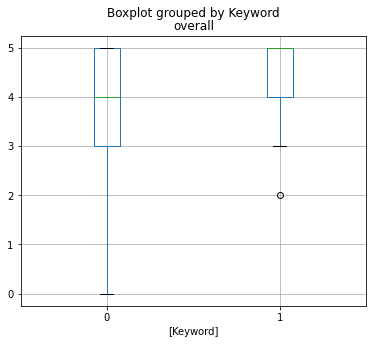

In [12]:
df.assign(Keyword = lambda x:x.text.str.lower().str.contains('sensual')*1)[['Keyword','overall']].\
    boxplot(by='Keyword',figsize=(6,5))

In [13]:
import numpy as np
import pandas as pd

p, q = np.linspace(1, 10, 10), np.linspace(1, 10, 10)

def expand_grid(x, y):
    xG, yG = np.meshgrid(x, y) # create the actual grid
    xG = xG.flatten() # make the grid 1d
    yG = yG.flatten() # same
    return pd.DataFrame({'x':xG, 'y':yG})

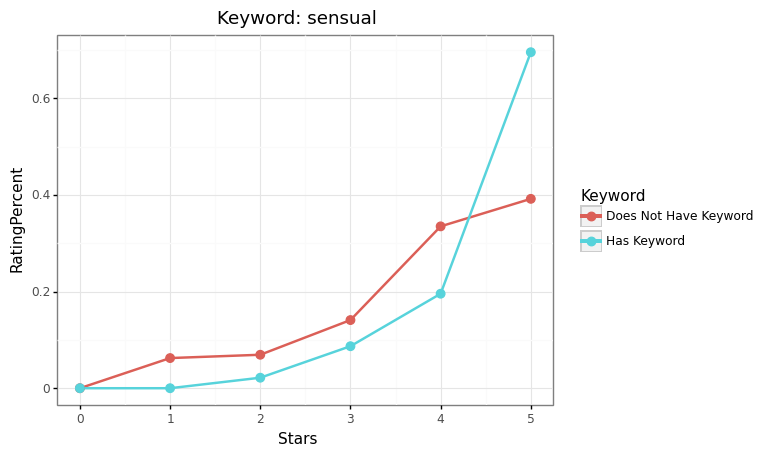

<ggplot: (-9223371875373419064)>

In [191]:
word='sensual'

WordMine=expand_grid(df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['Keyword'].drop_duplicates(),
           df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['overall'].drop_duplicates()).\
    rename(columns={"x":"Keyword","y":"overall"}).\
    set_index(['Keyword','overall']).\
    join(df.\
    assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)[['Keyword','overall']].\
    assign(dummy=1).\
    assign(Pop= lambda x:x.groupby('Keyword')['dummy'].transform('sum')).\
    assign(RateCount= lambda x:x.groupby(['Keyword','overall'])['dummy'].transform('sum')).\
    sort_values(['Keyword','overall']).\
    drop_duplicates(['Keyword','overall']).drop('dummy',axis=1).set_index(['Keyword','overall'])
        ).\
    reset_index().\
    fillna(0).\
    sort_values(['Keyword','overall']).\
    assign(RatingPercent=lambda x:x.RateCount/x.Pop).\
    fillna(0).\
    assign(Keyword= lambda x:np.where(x.Keyword==1,'Has Keyword','Does Not Have Keyword'))

(

    ggplot(WordMine,aes(x='overall',y='RatingPercent',group='Keyword',color='Keyword'))+
    geom_line(size=1)+
    geom_point(size=3)+
    xlab('Stars')+
    theme_bw()+ggtitle("Keyword: "+word)
)

In [66]:
get_ngrams(df[(df['text'].str.lower().str.contains('sensual'))]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),2).\
           value_counts().reset_index().\
           rename(columns={0:'Count'}).\
            assign(Keyword2 =lambda x:x.text.str.contains('sensual')*1).query('Keyword2==1')[['text','Count']].head(10)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,text,Count
39,sensual lighting,2
49,sensual feel,2
203,presumably sensual,1
208,pretty sensual,1
240,pure sensuality,1
241,purchase sensual,1
299,pillars sensual,1
440,romantic sensual,1
582,room sensual,1
660,quality sensual,1


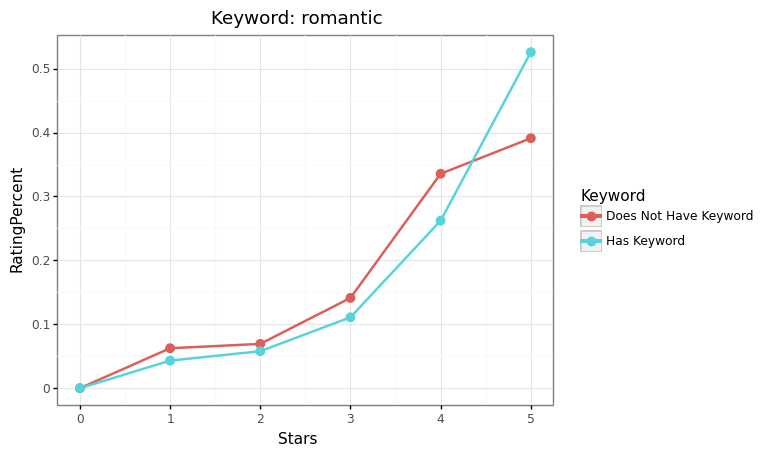

<ggplot: (-9223371875373457424)>

In [192]:
word='romantic'

WordMine=expand_grid(df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['Keyword'].drop_duplicates(),
           df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['overall'].drop_duplicates()).\
    rename(columns={"x":"Keyword","y":"overall"}).\
    set_index(['Keyword','overall']).\
    join(df.\
    assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)[['Keyword','overall']].\
    assign(dummy=1).\
    assign(Pop= lambda x:x.groupby('Keyword')['dummy'].transform('sum')).\
    assign(RateCount= lambda x:x.groupby(['Keyword','overall'])['dummy'].transform('sum')).\
    sort_values(['Keyword','overall']).\
    drop_duplicates(['Keyword','overall']).drop('dummy',axis=1).set_index(['Keyword','overall'])
        ).\
    reset_index().\
    fillna(0).\
    sort_values(['Keyword','overall']).\
    assign(RatingPercent=lambda x:x.RateCount/x.Pop).\
    fillna(0).\
    assign(Keyword= lambda x:np.where(x.Keyword==1,'Has Keyword','Does Not Have Keyword'))

(

    ggplot(WordMine,aes(x='overall',y='RatingPercent',group='Keyword',color='Keyword'))+
    geom_line(size=1)+
    geom_point(size=3)+
    xlab('Stars')+
    theme_bw()+ggtitle("Keyword: "+word)
)

In [65]:
get_ngrams(df[(df['text'].str.lower().str.contains('romantic'))]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),2).\
           value_counts().reset_index().\
           rename(columns={0:'Count'}).\
            assign(Keyword2 =lambda x:x.text.str.contains('romantic')*1).query('Keyword2==1')[['text','Count']].head(10)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,text,Count
1,romantic getaway,1029
2,romantic weekend,688
20,looking romantic,260
31,hotel romantic,215
33,romantic away,212
61,place romantic,154
76,romantic hotel,140
80,romantic night,136
83,romantic stay,134
95,perfect romantic,125


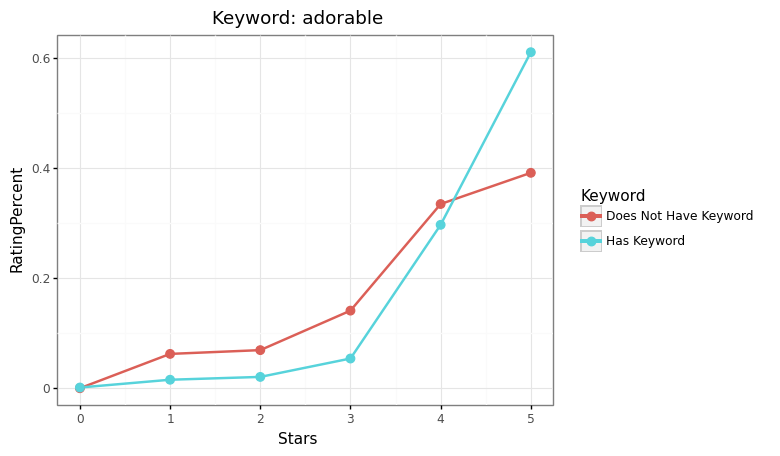

<ggplot: (-9223371875373494788)>

In [193]:
word='adorable'

WordMine=expand_grid(df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['Keyword'].drop_duplicates(),
           df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['overall'].drop_duplicates()).\
    rename(columns={"x":"Keyword","y":"overall"}).\
    set_index(['Keyword','overall']).\
    join(df.\
    assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)[['Keyword','overall']].\
    assign(dummy=1).\
    assign(Pop= lambda x:x.groupby('Keyword')['dummy'].transform('sum')).\
    assign(RateCount= lambda x:x.groupby(['Keyword','overall'])['dummy'].transform('sum')).\
    sort_values(['Keyword','overall']).\
    drop_duplicates(['Keyword','overall']).drop('dummy',axis=1).set_index(['Keyword','overall'])
        ).\
    reset_index().\
    fillna(0).\
    sort_values(['Keyword','overall']).\
    assign(RatingPercent=lambda x:x.RateCount/x.Pop).\
    fillna(0).\
    assign(Keyword= lambda x:np.where(x.Keyword==1,'Has Keyword','Does Not Have Keyword'))

(

    ggplot(WordMine,aes(x='overall',y='RatingPercent',group='Keyword',color='Keyword'))+
    geom_line(size=1)+
    geom_point(size=3)+
    xlab('Stars')+
    theme_bw()+ggtitle("Keyword: "+word)
)

In [64]:
get_ngrams(df[(df['text'].str.lower().str.contains('adorable'))]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),2).\
           value_counts().reset_index().\
           rename(columns={0:'Count'}).\
            assign(Keyword2 =lambda x:x.text.str.contains('adorable')*1).query('Keyword2==1')[['text','Count']].head(10)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,text,Count
14,room adorable,54
29,est adorable,43
38,hotel adorable,37
48,rooms adorable,32
58,adorable et,29
61,personnel adorable,28
95,adorable little,21
103,absolutely adorable,20
166,adorable hotel,15
188,adorable boutique,14


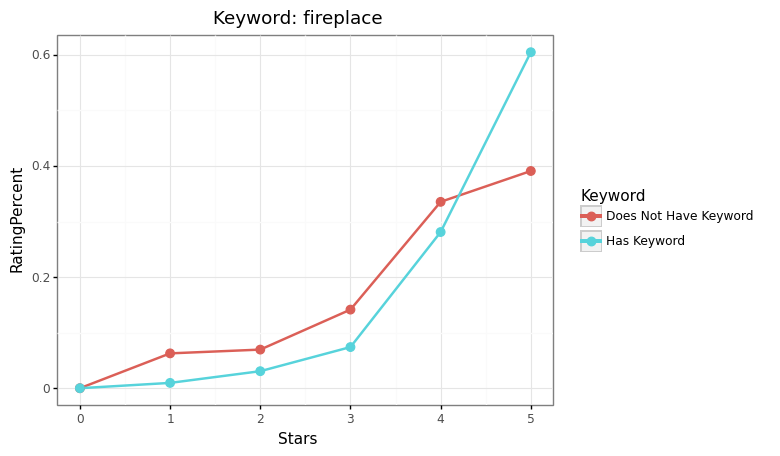

<ggplot: (-9223371875373518844)>

In [194]:
word='fireplace'

WordMine=expand_grid(df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['Keyword'].drop_duplicates(),
           df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['overall'].drop_duplicates()).\
    rename(columns={"x":"Keyword","y":"overall"}).\
    set_index(['Keyword','overall']).\
    join(df.\
    assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)[['Keyword','overall']].\
    assign(dummy=1).\
    assign(Pop= lambda x:x.groupby('Keyword')['dummy'].transform('sum')).\
    assign(RateCount= lambda x:x.groupby(['Keyword','overall'])['dummy'].transform('sum')).\
    sort_values(['Keyword','overall']).\
    drop_duplicates(['Keyword','overall']).drop('dummy',axis=1).set_index(['Keyword','overall'])
        ).\
    reset_index().\
    fillna(0).\
    sort_values(['Keyword','overall']).\
    assign(RatingPercent=lambda x:x.RateCount/x.Pop).\
    fillna(0).\
    assign(Keyword= lambda x:np.where(x.Keyword==1,'Has Keyword','Does Not Have Keyword'))

(

    ggplot(WordMine,aes(x='overall',y='RatingPercent',group='Keyword',color='Keyword'))+
    geom_line(size=1)+
    geom_point(size=3)+
    xlab('Stars')+
    theme_bw()+ggtitle("Keyword: "+word)
)

In [63]:
get_ngrams(df[(df['text'].str.lower().str.contains('fireplace'))]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),2).\
           value_counts().reset_index().\
           rename(columns={0:'Count'}).\
            assign(Keyword2 =lambda x:x.text.str.contains('fireplace')*1).query('Keyword2==1')[['text','Count']].head(10)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,text,Count
10,gas fireplace,309
12,room fireplace,308
25,fireplace room,233
44,fireplace lobby,163
52,lobby fireplace,153
58,area fireplace,144
77,fireplace nice,131
84,nice fireplace,125
128,working fireplace,101
139,cozy fireplace,95


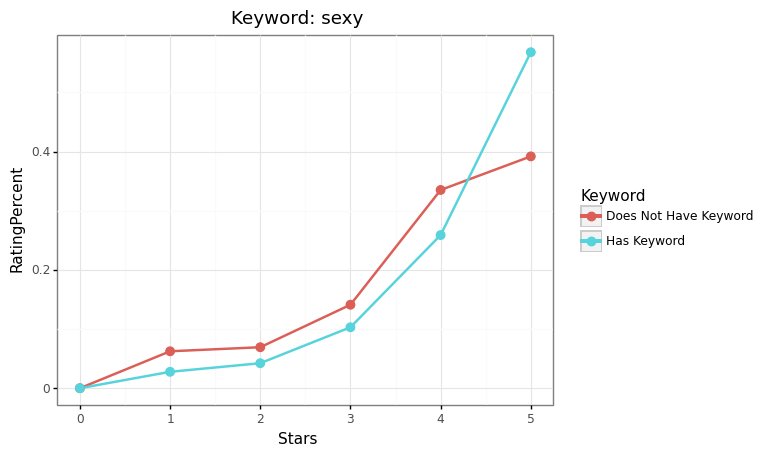

<ggplot: (-9223371875373554332)>

In [195]:
word='sexy'

WordMine=expand_grid(df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['Keyword'].drop_duplicates(),
           df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['overall'].drop_duplicates()).\
    rename(columns={"x":"Keyword","y":"overall"}).\
    set_index(['Keyword','overall']).\
    join(df.\
    assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)[['Keyword','overall']].\
    assign(dummy=1).\
    assign(Pop= lambda x:x.groupby('Keyword')['dummy'].transform('sum')).\
    assign(RateCount= lambda x:x.groupby(['Keyword','overall'])['dummy'].transform('sum')).\
    sort_values(['Keyword','overall']).\
    drop_duplicates(['Keyword','overall']).drop('dummy',axis=1).set_index(['Keyword','overall'])
        ).\
    reset_index().\
    fillna(0).\
    sort_values(['Keyword','overall']).\
    assign(RatingPercent=lambda x:x.RateCount/x.Pop).\
    fillna(0).\
    assign(Keyword= lambda x:np.where(x.Keyword==1,'Has Keyword','Does Not Have Keyword'))

(

    ggplot(WordMine,aes(x='overall',y='RatingPercent',group='Keyword',color='Keyword'))+
    geom_line(size=1)+
    geom_point(size=3)+
    xlab('Stars')+
    theme_bw()+ggtitle("Keyword: "+word)
)

In [67]:
get_ngrams(df[(df['text'].str.lower().str.contains('sexy'))]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),2).\
           value_counts().reset_index().\
           rename(columns={0:'Count'}).\
            assign(Keyword2 =lambda x:x.text.str.contains('sexy')*1).query('Keyword2==1')[['text','Count']].head(10)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,text,Count
16,sexy hotel,39
29,hotel sexy,30
39,modern sexy,25
58,sleek sexy,20
67,dark sexy,20
89,chic sexy,18
100,room sexy,17
101,hip sexy,16
108,sexy chic,16
131,sexy vibe,15


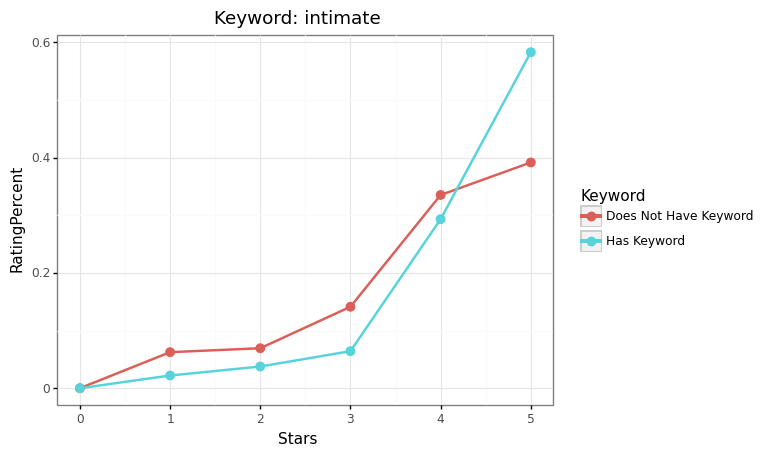

<ggplot: (-9223371875373779408)>

In [202]:
word='intimate'

WordMine=expand_grid(df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['Keyword'].drop_duplicates(),
           df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['overall'].drop_duplicates()).\
    rename(columns={"x":"Keyword","y":"overall"}).\
    set_index(['Keyword','overall']).\
    join(df.\
    assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)[['Keyword','overall']].\
    assign(dummy=1).\
    assign(Pop= lambda x:x.groupby('Keyword')['dummy'].transform('sum')).\
    assign(RateCount= lambda x:x.groupby(['Keyword','overall'])['dummy'].transform('sum')).\
    sort_values(['Keyword','overall']).\
    drop_duplicates(['Keyword','overall']).drop('dummy',axis=1).set_index(['Keyword','overall'])
        ).\
    reset_index().\
    fillna(0).\
    sort_values(['Keyword','overall']).\
    assign(RatingPercent=lambda x:x.RateCount/x.Pop).\
    fillna(0).\
    assign(Keyword= lambda x:np.where(x.Keyword==1,'Has Keyword','Does Not Have Keyword'))

(

    ggplot(WordMine,aes(x='overall',y='RatingPercent',group='Keyword',color='Keyword'))+
    geom_line(size=1)+
    geom_point(size=3)+
    xlab('Stars')+
    theme_bw()+ggtitle("Keyword: "+word)
)

In [79]:
get_ngrams(df[(df['text'].str.lower().str.contains('intimate'))]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),2).\
           value_counts().reset_index().\
           rename(columns={0:'Count'}).\
            assign(Keyword2 =lambda x:x.text.str.contains('intimate')*1).query('Keyword2==1')[['text','Count']].head(10)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.


,text,Count
2,small intimate,272
11,intimate hotel,137
19,intimate feel,109
22,hotel intimate,102
56,smaller intimate,62
63,intimate setting,59
75,intimate boutique,54
105,intimate bar,44
124,quiet intimate,40
132,intimate lobby,39


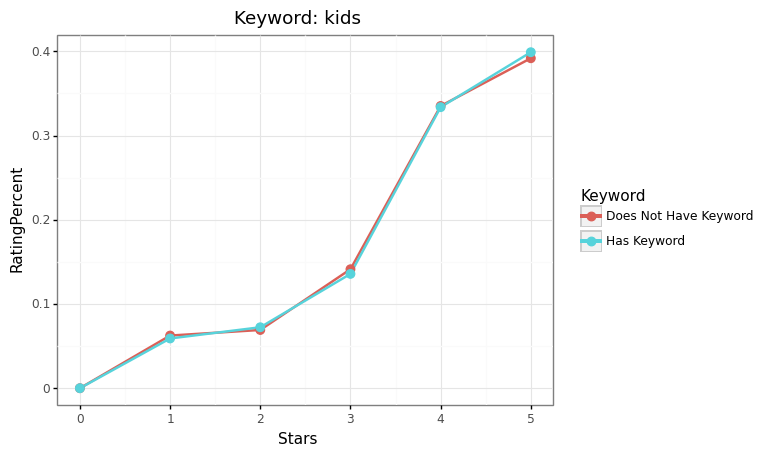

<ggplot: (-9223371875373782344)>

In [203]:
word='kids'

WordMine=expand_grid(df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['Keyword'].drop_duplicates(),
           df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['overall'].drop_duplicates()).\
    rename(columns={"x":"Keyword","y":"overall"}).\
    set_index(['Keyword','overall']).\
    join(df.\
    assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)[['Keyword','overall']].\
    assign(dummy=1).\
    assign(Pop= lambda x:x.groupby('Keyword')['dummy'].transform('sum')).\
    assign(RateCount= lambda x:x.groupby(['Keyword','overall'])['dummy'].transform('sum')).\
    sort_values(['Keyword','overall']).\
    drop_duplicates(['Keyword','overall']).drop('dummy',axis=1).set_index(['Keyword','overall'])
        ).\
    reset_index().\
    fillna(0).\
    sort_values(['Keyword','overall']).\
    assign(RatingPercent=lambda x:x.RateCount/x.Pop).\
    fillna(0).\
    assign(Keyword= lambda x:np.where(x.Keyword==1,'Has Keyword','Does Not Have Keyword'))

(

    ggplot(WordMine,aes(x='overall',y='RatingPercent',group='Keyword',color='Keyword'))+
    geom_line(size=1)+
    geom_point(size=3)+
    xlab('Stars')+
    theme_bw()+ggtitle("Keyword: "+word)
)

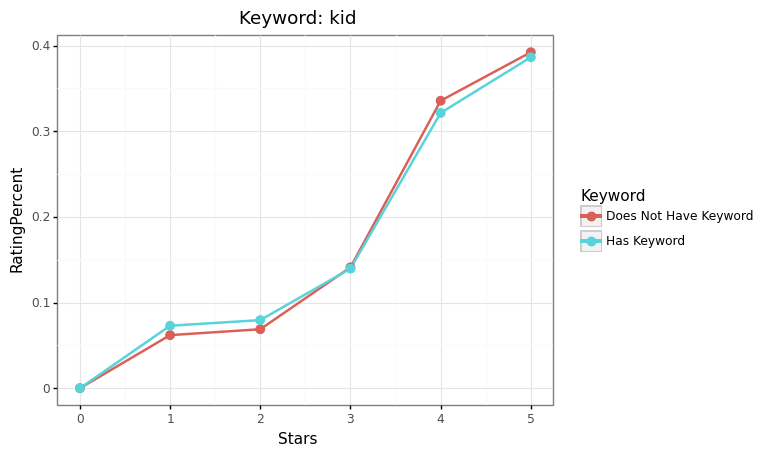

<ggplot: (-9223371875373845544)>

In [204]:
word='kid'

WordMine=expand_grid(df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['Keyword'].drop_duplicates(),
           df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['overall'].drop_duplicates()).\
    rename(columns={"x":"Keyword","y":"overall"}).\
    set_index(['Keyword','overall']).\
    join(df.\
    assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)[['Keyword','overall']].\
    assign(dummy=1).\
    assign(Pop= lambda x:x.groupby('Keyword')['dummy'].transform('sum')).\
    assign(RateCount= lambda x:x.groupby(['Keyword','overall'])['dummy'].transform('sum')).\
    sort_values(['Keyword','overall']).\
    drop_duplicates(['Keyword','overall']).drop('dummy',axis=1).set_index(['Keyword','overall'])
        ).\
    reset_index().\
    fillna(0).\
    sort_values(['Keyword','overall']).\
    assign(RatingPercent=lambda x:x.RateCount/x.Pop).\
    fillna(0).\
    assign(Keyword= lambda x:np.where(x.Keyword==1,'Has Keyword','Does Not Have Keyword'))

(

    ggplot(WordMine,aes(x='overall',y='RatingPercent',group='Keyword',color='Keyword'))+
    geom_line(size=1)+
    geom_point(size=3)+
    xlab('Stars')+
    theme_bw()+ggtitle("Keyword: "+word)
)

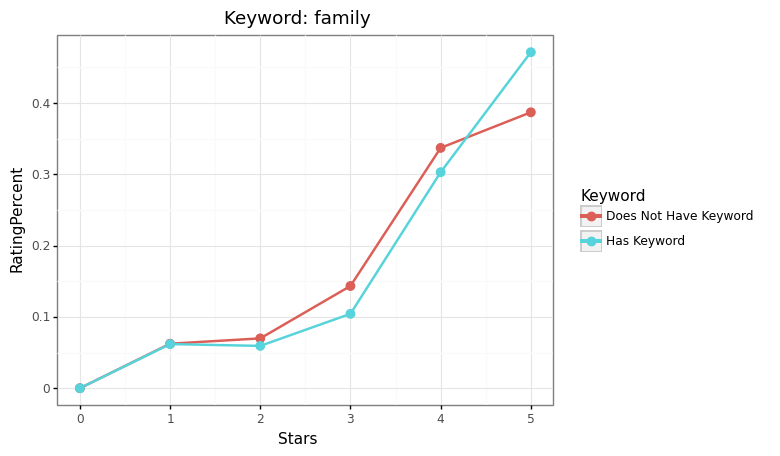

<ggplot: (-9223371899119954860)>

In [76]:
word='family'

WordMine=expand_grid(df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['Keyword'].drop_duplicates(),
           df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['overall'].drop_duplicates()).\
    rename(columns={"x":"Keyword","y":"overall"}).\
    set_index(['Keyword','overall']).\
    join(df.\
    assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)[['Keyword','overall']].\
    assign(dummy=1).\
    assign(Pop= lambda x:x.groupby('Keyword')['dummy'].transform('sum')).\
    assign(RateCount= lambda x:x.groupby(['Keyword','overall'])['dummy'].transform('sum')).\
    sort_values(['Keyword','overall']).\
    drop_duplicates(['Keyword','overall']).drop('dummy',axis=1).set_index(['Keyword','overall'])
        ).\
    reset_index().\
    fillna(0).\
    sort_values(['Keyword','overall']).\
    assign(RatingPercent=lambda x:x.RateCount/x.Pop).\
    fillna(0).\
    assign(Keyword= lambda x:np.where(x.Keyword==1,'Has Keyword','Does Not Have Keyword'))

(

    ggplot(WordMine,aes(x='overall',y='RatingPercent',group='Keyword',color='Keyword'))+
    geom_line(size=1)+
    geom_point(size=3)+
    xlab('Stars')+
    theme_bw()+ggtitle("Keyword: "+word)
)

In [77]:
get_ngrams(df[(df['text'].str.lower().str.contains('family'))]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),2).\
           value_counts().reset_index().\
           rename(columns={0:'Count'}).\
            assign(Keyword2 =lambda x:x.text.str.contains('family')*1).query('Keyword2==1')[['text','Count']].head(10)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.


,text,Count
12,family stayed,3078
14,friends family,2693
28,family four,2148
34,family 4,1898
37,family friends,1786
41,hotel family,1724
52,family friendly,1603
54,family vacation,1515
66,family members,1346
103,stayed family,1044


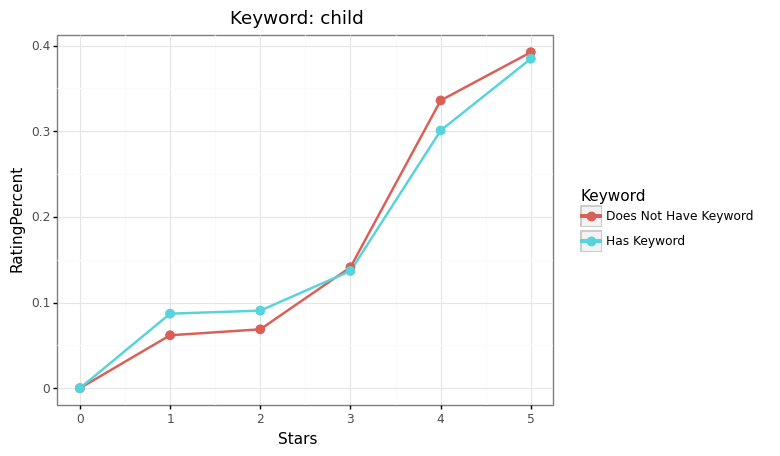

<ggplot: (-9223371875373887068)>

In [205]:
word='child'

WordMine=expand_grid(df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['Keyword'].drop_duplicates(),
           df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['overall'].drop_duplicates()).\
    rename(columns={"x":"Keyword","y":"overall"}).\
    set_index(['Keyword','overall']).\
    join(df.\
    assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)[['Keyword','overall']].\
    assign(dummy=1).\
    assign(Pop= lambda x:x.groupby('Keyword')['dummy'].transform('sum')).\
    assign(RateCount= lambda x:x.groupby(['Keyword','overall'])['dummy'].transform('sum')).\
    sort_values(['Keyword','overall']).\
    drop_duplicates(['Keyword','overall']).drop('dummy',axis=1).set_index(['Keyword','overall'])
        ).\
    reset_index().\
    fillna(0).\
    sort_values(['Keyword','overall']).\
    assign(RatingPercent=lambda x:x.RateCount/x.Pop).\
    fillna(0).\
    assign(Keyword= lambda x:np.where(x.Keyword==1,'Has Keyword','Does Not Have Keyword'))

(

    ggplot(WordMine,aes(x='overall',y='RatingPercent',group='Keyword',color='Keyword'))+
    geom_line(size=1)+
    geom_point(size=3)+
    xlab('Stars')+
    theme_bw()+ggtitle("Keyword: "+word)
)

In [78]:
get_ngrams(df[(df['text'].str.lower().str.contains('child'))]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),2).\
           value_counts().reset_index().\
           rename(columns={0:'Count'}).\
            assign(Keyword2 =lambda x:x.text.str.contains('child')*1).query('Keyword2==1')[['text','Count']].head(10)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.


,text,Count
2,small children,1931
6,young children,1817
16,two children,1206
23,2 children,970
82,children ages,519
123,3 children,430
126,traveling children,428
137,families children,406
155,children room,387
167,children stayed,365


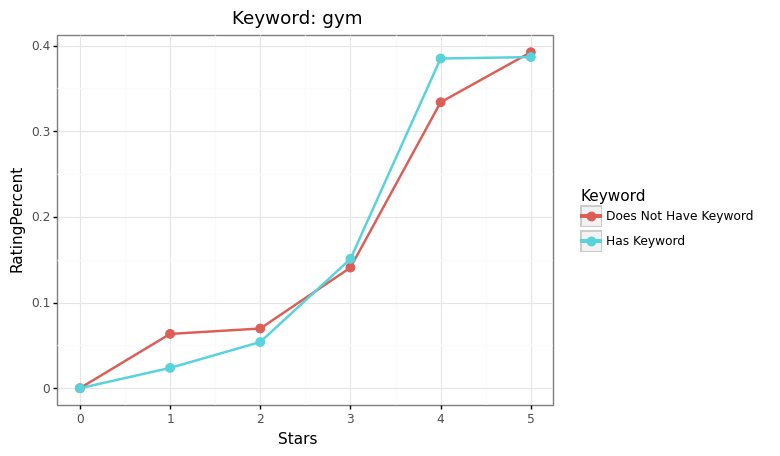

<ggplot: (-9223371875373848916)>

In [206]:
word='gym'

WordMine=expand_grid(df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['Keyword'].drop_duplicates(),
           df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['overall'].drop_duplicates()).\
    rename(columns={"x":"Keyword","y":"overall"}).\
    set_index(['Keyword','overall']).\
    join(df.\
    assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)[['Keyword','overall']].\
    assign(dummy=1).\
    assign(Pop= lambda x:x.groupby('Keyword')['dummy'].transform('sum')).\
    assign(RateCount= lambda x:x.groupby(['Keyword','overall'])['dummy'].transform('sum')).\
    sort_values(['Keyword','overall']).\
    drop_duplicates(['Keyword','overall']).drop('dummy',axis=1).set_index(['Keyword','overall'])
        ).\
    reset_index().\
    fillna(0).\
    sort_values(['Keyword','overall']).\
    assign(RatingPercent=lambda x:x.RateCount/x.Pop).\
    fillna(0).\
    assign(Keyword= lambda x:np.where(x.Keyword==1,'Has Keyword','Does Not Have Keyword'))

(

    ggplot(WordMine,aes(x='overall',y='RatingPercent',group='Keyword',color='Keyword'))+
    geom_line(size=1)+
    geom_point(size=3)+
    xlab('Stars')+
    theme_bw()+ggtitle("Keyword: "+word)
)

In [73]:
get_ngrams(df[(df['text'].str.lower().str.contains('gym'))]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),2).\
           value_counts().reset_index().\
           rename(columns={0:'Count'}).\
            assign(Keyword2 =lambda x:x.text.str.contains('gym')*1).query('Keyword2==1')[['text','Count']].head(10)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,text,Count
9,pool gym,1246
11,gym pool,1226
17,hotel gym,1028
26,use gym,890
37,gym small,819
49,nice gym,741
52,small gym,713
56,gym nice,697
77,great gym,578
84,gym great,559


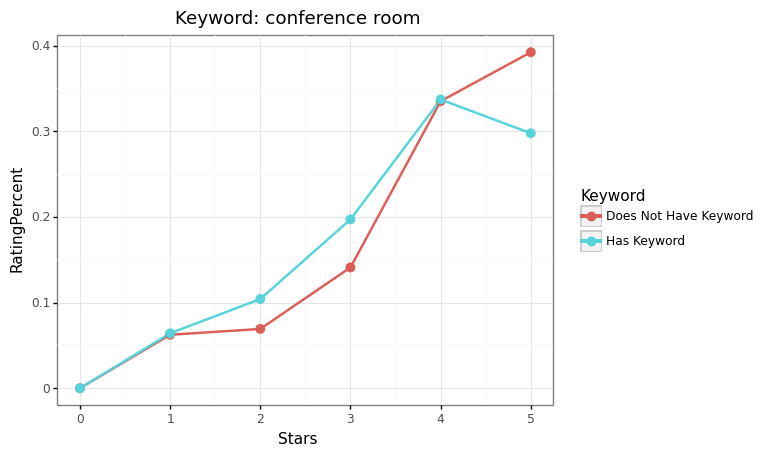

<ggplot: (-9223371875373940832)>

In [207]:
word='conference room'

WordMine=expand_grid(df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['Keyword'].drop_duplicates(),
           df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['overall'].drop_duplicates()).\
    rename(columns={"x":"Keyword","y":"overall"}).\
    set_index(['Keyword','overall']).\
    join(df.\
    assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)[['Keyword','overall']].\
    assign(dummy=1).\
    assign(Pop= lambda x:x.groupby('Keyword')['dummy'].transform('sum')).\
    assign(RateCount= lambda x:x.groupby(['Keyword','overall'])['dummy'].transform('sum')).\
    sort_values(['Keyword','overall']).\
    drop_duplicates(['Keyword','overall']).drop('dummy',axis=1).set_index(['Keyword','overall'])
        ).\
    reset_index().\
    fillna(0).\
    sort_values(['Keyword','overall']).\
    assign(RatingPercent=lambda x:x.RateCount/x.Pop).\
    fillna(0).\
    assign(Keyword= lambda x:np.where(x.Keyword==1,'Has Keyword','Does Not Have Keyword'))

(

    ggplot(WordMine,aes(x='overall',y='RatingPercent',group='Keyword',color='Keyword'))+
    geom_line(size=1)+
    geom_point(size=3)+
    xlab('Stars')+
    theme_bw()+ggtitle("Keyword: "+word)
)

In [72]:
get_ngrams(df[(df['text'].str.lower().str.contains('conference room'))]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),3).\
           value_counts().reset_index().\
           rename(columns={0:'Count'}).\
            assign(Keyword2 =lambda x:x.text.str.contains('conference room')*1).query('Keyword2==1')[['text','Count']].head(10)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,text,Count
4,hotel conference rooms,36
6,conference rooms nice,33
8,lobby conference rooms,25
10,small conference room,24
11,room conference room,24
12,rooms conference rooms,23
13,floor conference rooms,22
16,meeting conference rooms,21
17,conference conference rooms,21
19,conference rooms great,20


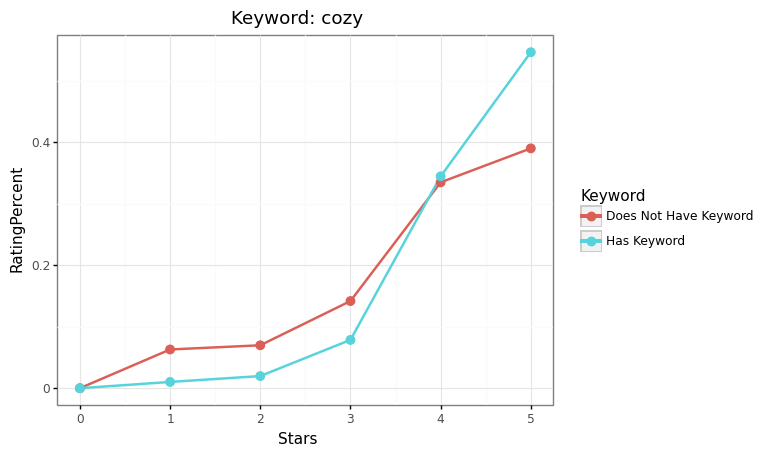

<ggplot: (-9223371899139168752)>

In [80]:
word='cozy'

WordMine=expand_grid(df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['Keyword'].drop_duplicates(),
           df.assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)['overall'].drop_duplicates()).\
    rename(columns={"x":"Keyword","y":"overall"}).\
    set_index(['Keyword','overall']).\
    join(df.\
    assign(Keyword = lambda x:x.text.str.lower().str.contains(word)*1)[['Keyword','overall']].\
    assign(dummy=1).\
    assign(Pop= lambda x:x.groupby('Keyword')['dummy'].transform('sum')).\
    assign(RateCount= lambda x:x.groupby(['Keyword','overall'])['dummy'].transform('sum')).\
    sort_values(['Keyword','overall']).\
    drop_duplicates(['Keyword','overall']).drop('dummy',axis=1).set_index(['Keyword','overall'])
        ).\
    reset_index().\
    fillna(0).\
    sort_values(['Keyword','overall']).\
    assign(RatingPercent=lambda x:x.RateCount/x.Pop).\
    fillna(0).\
    assign(Keyword= lambda x:np.where(x.Keyword==1,'Has Keyword','Does Not Have Keyword'))

(

    ggplot(WordMine,aes(x='overall',y='RatingPercent',group='Keyword',color='Keyword'))+
    geom_line(size=1)+
    geom_point(size=3)+
    xlab('Stars')+
    theme_bw()+ggtitle("Keyword: "+word)
)

In [83]:
get_ngrams(df[(df['text'].str.lower().str.contains('cozy'))]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),2).\
           value_counts().reset_index().\
           rename(columns={0:'Count'}).\
            assign(Keyword2 =lambda x:x.text.str.contains('cozy')*1).query('Keyword2==1')[['text','Count']].head(15)

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.


,text,Count
8,room cozy,776
12,clean cozy,642
16,small cozy,576
27,rooms cozy,475
29,cozy room,449
35,cozy clean,406
36,cozy comfortable,399
41,nice cozy,344
62,comfortable cozy,271
64,warm cozy,271


In [ ]:
df.\
    assign(Keyword = lambda x:x.text.str.lower().str.contains('sensual')*1)[['Keyword','overall']]

In [75]:
from plotnine import *

<AxesSubplot:title={'center':'overall'}, xlabel='[Keyword]'>

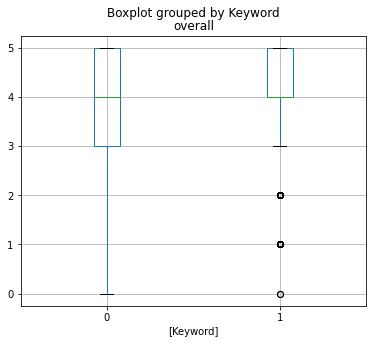

In [114]:
df.assign(Keyword = lambda x:x.text.str.lower().str.contains('spa')*1)[['Keyword','overall']].\
    boxplot(by='Keyword',figsize=(6,5))

<AxesSubplot:title={'center':'overall'}, xlabel='[Has_Gym]'>

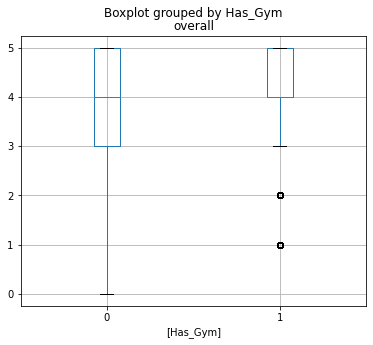

In [120]:
df.assign(Has_Gym = lambda x:x.text.str.lower().str.contains('gym')*1)[['Has_Gym','overall']].\
    boxplot(by='Has_Gym',figsize=(6,5))

<AxesSubplot:title={'center':'overall'}, xlabel='[Has_conference_room]'>

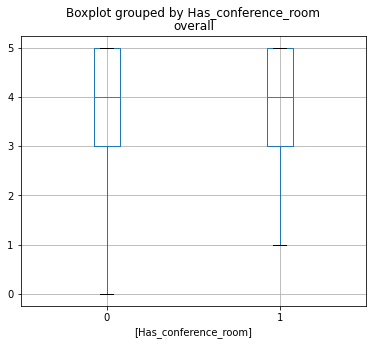

In [119]:
df.assign(Has_conference_room = lambda x:x.text.str.lower().str.contains('conference room')*1)[['Has_conference_room','overall']].\
    boxplot(by='Has_conference_room',figsize=(6,5))

<AxesSubplot:title={'center':'overall'}, xlabel='[Has_Pool]'>

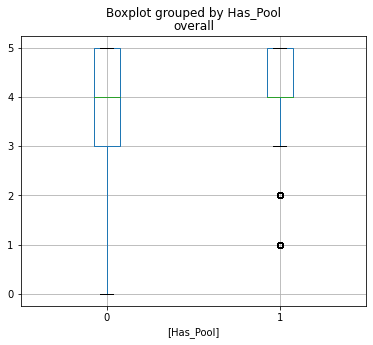

In [126]:
df.assign(Has_Pool = lambda x:x.text.str.lower().str.contains('pool')*1)[['Has_Pool','overall']].\
    boxplot(by='Has_Pool',figsize=(6,5))

In [ ]:
get_ngrams(df[(df['text'].str.lower().str.contains('safe'))  & (df['overall']<=2.0) ]['text'].str.replace(r'[^\w\s]+', ' ').\
           str.lower().apply(nltk.word_tokenize).\
           apply(tokennamefilter).\
           apply(' '.join),2).\
           value_counts().head(25)

In [9]:
df[(df['text'].str.lower().str.contains('gym'))  & (df['overall']==5.0) ]

,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,service,cleanliness,overall,value,location,sleep_quality,rooms,check_in_front_desk,business_service_(e_g_internet_access)
76,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Excellent service”,"My bf and I go to New York quite regularly, an...","{'username': 'Jia24', 'num_cities': 3, 'num_he...",October 2012,1641016,1,2012-11-28,146346783,False,5.0,5.0,5.0,4.0,5.0,5.0,5.0,NaN,NaN
131,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Well priced, clean spot for downtown”",I'm awarding this Best Western 5 stars as it m...,"{'username': 'Tartan69', 'num_cities': 53, 'nu...",November 2012,239853,0,2012-11-23,146014496,False,5.0,5.0,5.0,5.0,4.0,4.0,4.0,NaN,NaN
373,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Great Hotel!”,We were in Houston this past weekend. The Four...,"{'username': 'LilyJarrettsville_MD', 'num_citi...",October 2012,98952,0,2012-10-25,143704928,False,5.0,5.0,5.0,5.0,2.0,5.0,5.0,NaN,NaN
485,{'overall': 5.0},“Perfect for traveling with teens/tweens!”,I spent hours researching NYC hotels with suit...,"{'username': 'WhineyGirl', 'num_cities': 2, 'n...",August 2012,80112,2,2012-08-22,138010441,False,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
505,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Best View I've EVER had!”,I chose this hotel because it is the closest h...,"{'username': 'Intrepid_Traveler13', 'num_citie...",November 2012,93338,3,2012-11-10,145090743,False,5.0,5.0,5.0,3.0,5.0,4.0,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849558,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Location, location, location!”","As an avid traveler, this hotel had all of the...","{'username': 'KMNchicago', 'num_cities': 9, 'n...",April 2011,84067,0,2011-04-20,104786831,False,5.0,5.0,5.0,4.0,5.0,5.0,5.0,NaN,NaN
849597,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Well worth the $140.00 a night on the Executi...,"Before my trip, I read all the negative post's...","{'username': 'ElCache65', 'num_cities': 13, 'n...",December 2010,84107,0,2011-01-01,91289008,False,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN
849719,"{'service': 5.0, 'cleanliness': 4.0, 'overall'...",“Amazing Stay”,"I'm an avid Marriott customer, so I surprised ...","{'username': 'Azuredirection', 'num_cities': 6...",January 2011,84067,0,2011-02-05,95613093,False,5.0,4.0,5.0,5.0,5.0,5.0,4.0,NaN,NaN
849725,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Nice, spacious, great amenities”","I stayed here while traveling for business, so...","{'username': 'Nikki_and_David', 'num_cities': ...",April 2012,224337,1,2012-04-23,128447088,False,5.0,5.0,5.0,NaN,5.0,4.0,5.0,NaN,NaN
